#Parkinson's Disease Detection

Group Number: 13

Students:


1.   S.A Wijesinghe

     EG/2021/4877

---


2.   I.U Madakaladeniya

     EG/2021/4651





# Introduction

Parkinson's disease (PD) is the second most prevalent age-related neurological condition which causes a variety of physical and mental symptoms. It is challenging to diagnose Parkinson's disease (PD) because its symptoms are quite similar to those of other illnesses, like essential tremor and normal ageing. When a person reaches the age of 50, outward signs like trouble walking and speaking start to appear. Certain drugs relieve some of the symptoms of Parkinson's disease, despite the fact that there is a treatment available. By managing the complications brought on by the disease, patients are able to live their normal lives. Identifying the disease and stopping its progression are crucial at this stage.Parkinson's disease (PD) is a steadily deteriorating condition with symptoms that gradually arise over time, affects millions of people globally. About 10% of people exhibit symptoms of the disease before the age of 40, whereas prominent symptoms arise for those above 50 [1](https://www.healthdirect.gov.au/blog/parkinsons-disease-symptoms-in-your-30s-40s).

This project aims to build machine learning models to detect Parkinson's disease using biomedical voice measurements. In order to distinguish between healthy and PD patients based on voice signal characteristics, our project uses a two Machine Learning (ML) models, including Support Vector Machine (SVM), Random Forest Classifier(RF),195 voice recordings of examinations performed on 31 patients made up the dataset. In order to improve model performance, our models was trained using feature selection, hyperparameter tuning (GridSearchCV), feature scaling, and the Random Over-sampler.Evaluation techniques and metrics, including the Classification Report, F1-Score, Accuracy, Precision, Recall, and Confusion Matrix were used to evaluate the model performance.

# Literature Survey

Parkinson's Disease is named after James Parkinson
a British physician in 1817 [3](https://pmc.ncbi.nlm.nih.gov/articles/PMC3234454/#:~:text=Parkinson's%20disease%20was%20first%20medically,earlier%20descriptions%20(Parkinson%201817).). It has been proven that machine learning techniques are effective in detecting Parkinson's disease early on. These algorithms have been used for many years to diagnose diseases. For example, Lafunte and his colleagues used ANN in 1997 to separate individuals with lower limb arthritis from those in good health with 80% accuracy [4](https://www.sciencedirect.com/science/article/abs/pii/S026800339700082X). Using a collection of biological voice signals from both healthy and Parkinson samples, A. Sharma et al. (2014) applied pattern recognition, neural networks, and support vector machines to diagnose Parkinson's disease (PD) with an accuracy of 85.294% [5](https://pmc.ncbi.nlm.nih.gov/articles/PMC8134676/).
Another study was conducted in 2020, and the results showed that PD patients could be differentiated from healthy people at an early stage of the disease with accuracy rates of 93.5%, 96%, and 95.2% using features such as RMS, chroma STFT, spectral centroid, etc [6](https://www.revistaclinicapsicologica.com/archivesarticle.php?id=494).

#  Dataset Description


This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

**Matrix column entries (attributes):**
*   name - ASCII subject name and recording number
*   MDVP:Fo(Hz) - Average vocal fundamental frequency
*   MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
*   MDVP:Flo(Hz) - Minimum vocal fundamental frequency
*   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
*   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
*   NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*   status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*   RPDE,D2 - Two nonlinear dynamical complexity measures
*   DFA - Signal fractal scaling exponent
*   spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation'














# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the libraries**

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install plotly

In [ ]:
#to check the current path
os.getcwd()

'/content'

In [ ]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_column',25)
pd.set_option('display.width',200)

In [ ]:
# Load Data
data_path = "/content/drive/MyDrive/ML Project/parkinsons data.csv"
df = pd.read_csv(data_path)
print("Dataset Loaded. First 5 rows:")
print(df.head())

Dataset Loaded. First 5 rows:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784           0.00007   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968           0.00008   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050           0.00009   0.00544   0.00781     0.01633       0.05233             0.482       0.02757       0.03858   0.03590   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997           0.00009   0.00502   0.00698     0.01505       0.05492             0.517       0.02924       0

#  Data Preprocessing



**Find NULL values**

In [ ]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


There are no missing values in the dataset so, we don't need the step to impute missing values.

**Checking the data types of the columns**

In [ ]:
# Data types of columns
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


All the variables are numerical and there are no categorical variables, so we don't need to handle categorical variables.

**Checking whether there are any unnessesary characters in the data set.**


In [ ]:
for i in df.columns:
  print("**********************************************",i,"***********************************************")
  print()
  print(set(df[i].tolist()))
  print()

********************************************** name ***********************************************

{'phon_R01_S43_3', 'phon_R01_S39_5', 'phon_R01_S10_3', 'phon_R01_S27_4', 'phon_R01_S04_5', 'phon_R01_S02_5', 'phon_R01_S26_5', 'phon_R01_S33_4', 'phon_R01_S07_2', 'phon_R01_S17_3', 'phon_R01_S20_1', 'phon_R01_S05_3', 'phon_R01_S34_3', 'phon_R01_S37_2', 'phon_R01_S08_4', 'phon_R01_S34_1', 'phon_R01_S34_2', 'phon_R01_S44_3', 'phon_R01_S16_3', 'phon_R01_S07_1', 'phon_R01_S16_6', 'phon_R01_S32_5', 'phon_R01_S10_6', 'phon_R01_S07_6', 'phon_R01_S27_3', 'phon_R01_S22_1', 'phon_R01_S07_5', 'phon_R01_S37_1', 'phon_R01_S06_5', 'phon_R01_S25_3', 'phon_R01_S32_4', 'phon_R01_S27_7', 'phon_R01_S35_1', 'phon_R01_S44_1', 'phon_R01_S25_5', 'phon_R01_S31_2', 'phon_R01_S42_4', 'phon_R01_S50_6', 'phon_R01_S42_5', 'phon_R01_S18_1', 'phon_R01_S01_4', 'phon_R01_S20_2', 'phon_R01_S31_1', 'phon_R01_S18_6', 'phon_R01_S18_3', 'phon_R01_S43_1', 'phon_R01_S21_3', 'phon_R01_S08_2', 'phon_R01_S18_5', 'phon_R01_S05_1'

According to above results there are no any unnecessary characters in the dataset that would effect the performance of the model

**Checking how the dependent variable varies(Balanced/Imbalanced)**




Value Counts of 'status':
status
1    147
0     48
Name: count, dtype: int64


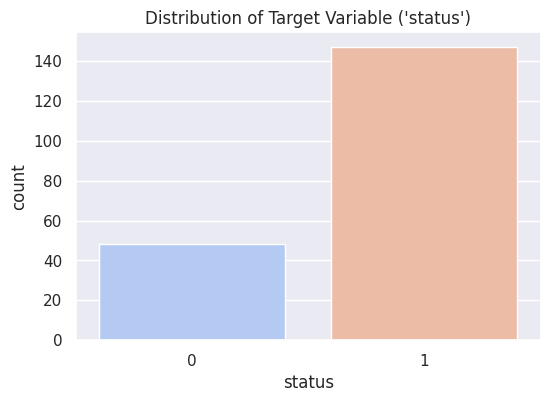

In [ ]:
# Distribution of 'status'
print("\nValue Counts of 'status':")
print(df['status'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df, palette='coolwarm')
plt.title("Distribution of Target Variable ('status')")
plt.show()

This results suggest that we need to scale the variables to avoid bias toward higher class

**Finding the distribution of the dataset**


Distribution plots for numeric features:


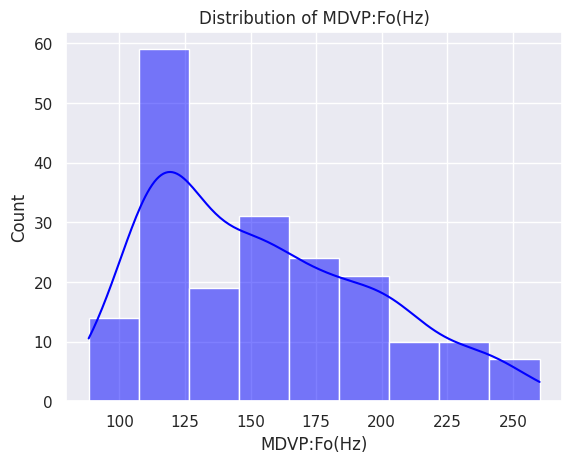

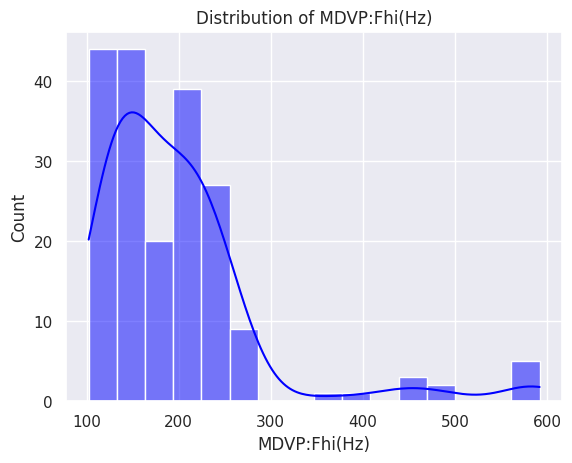

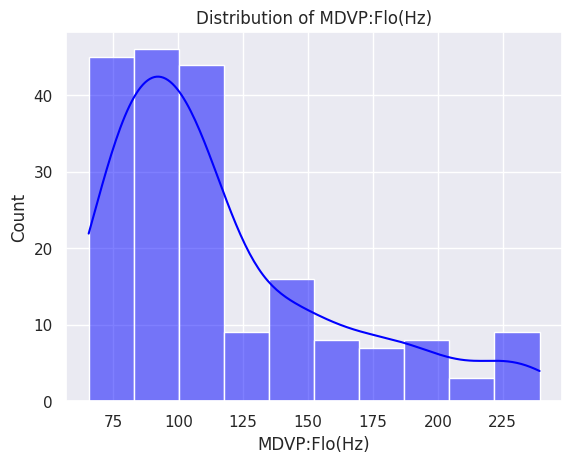

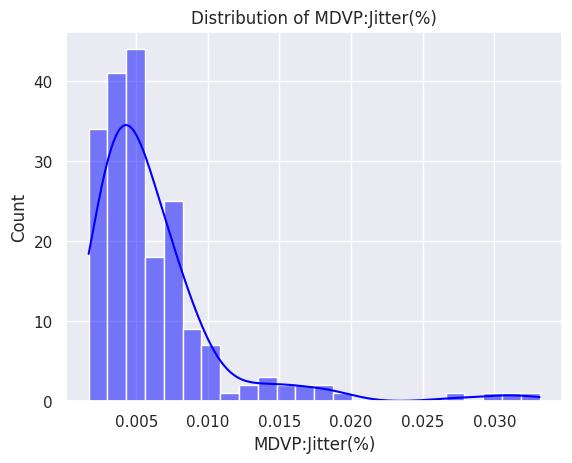

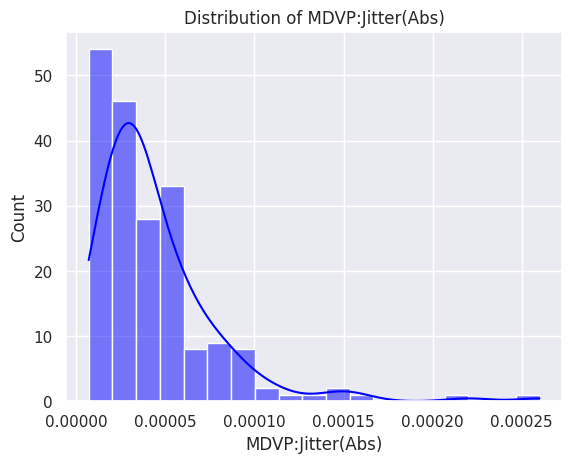

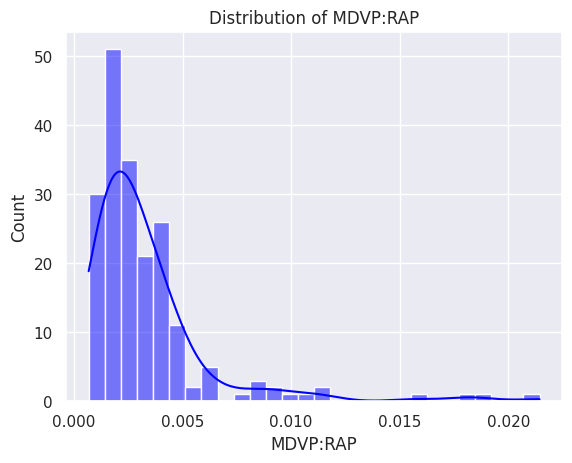

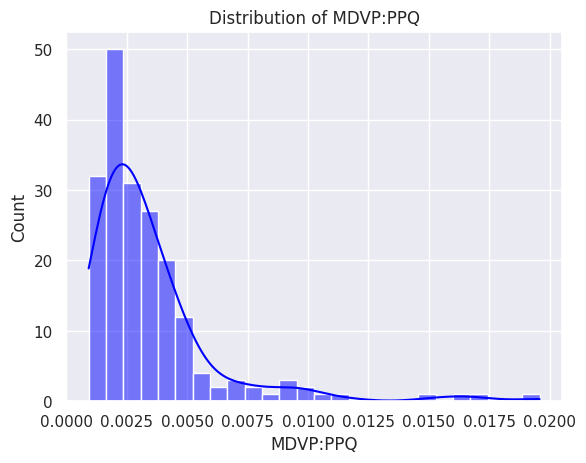

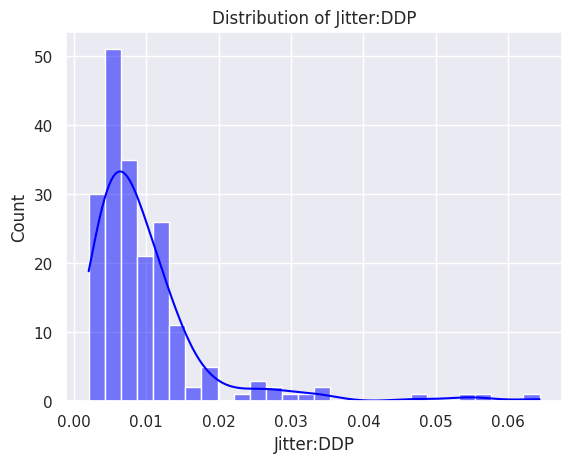

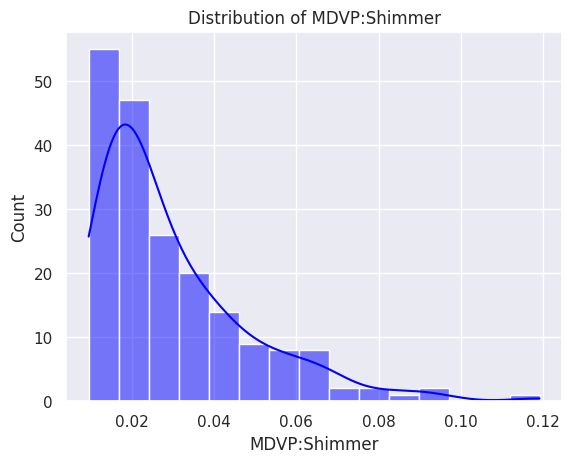

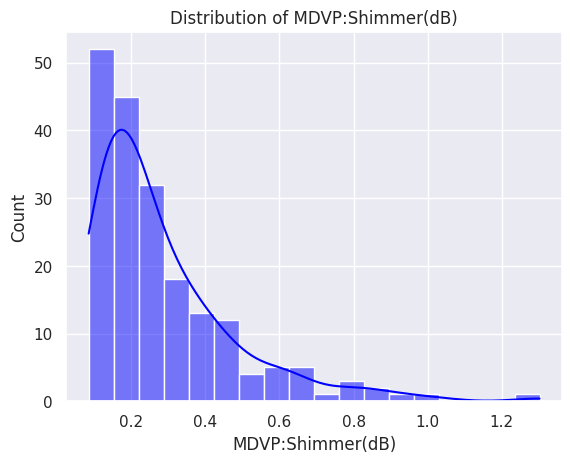

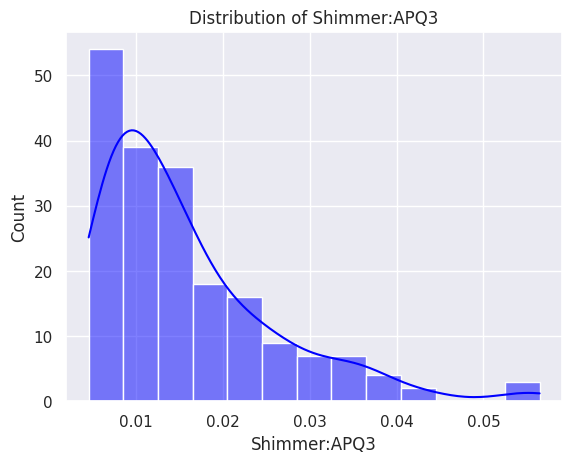

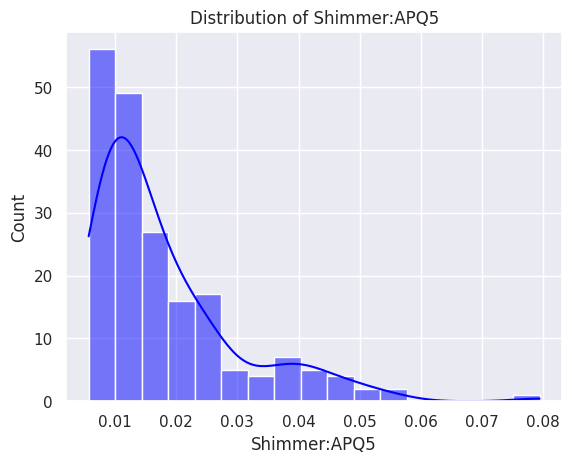

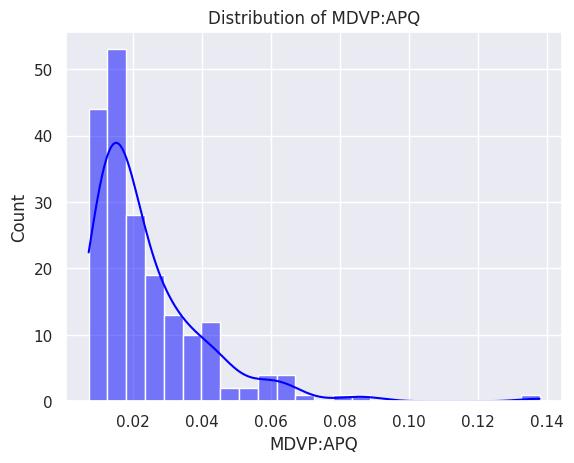

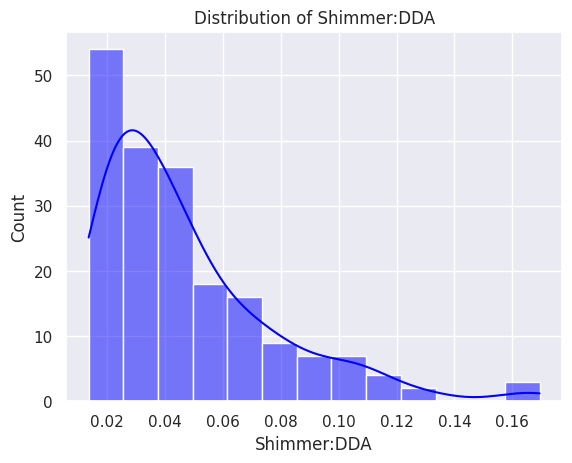

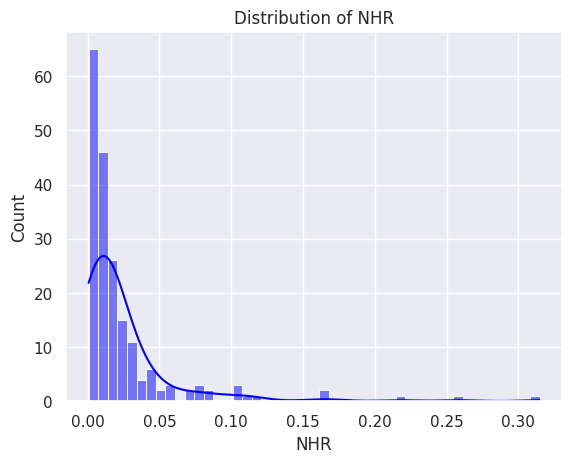

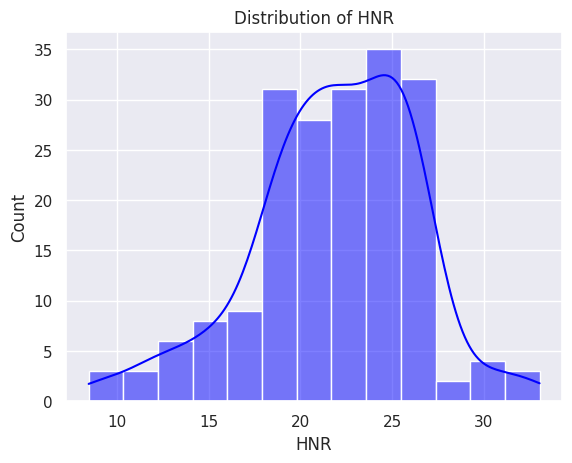

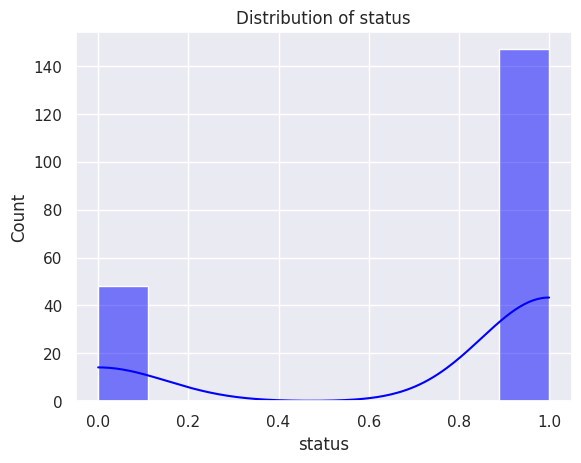

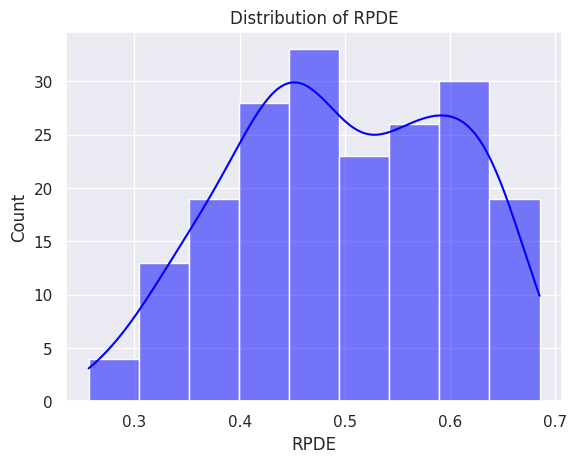

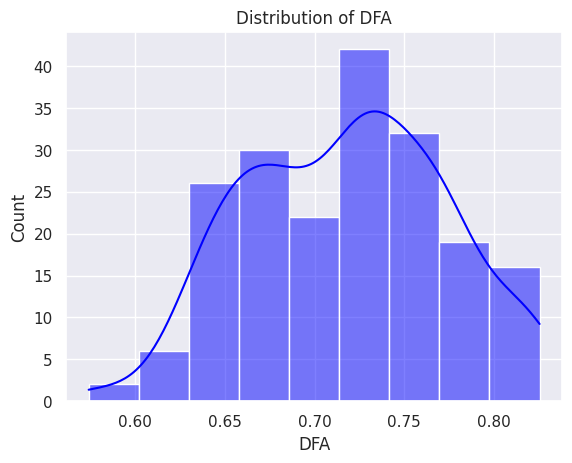

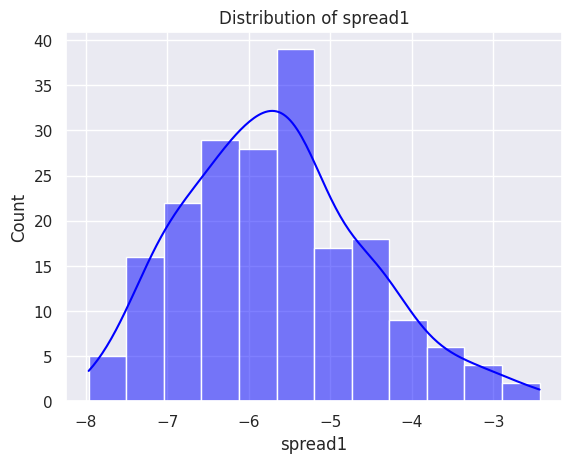

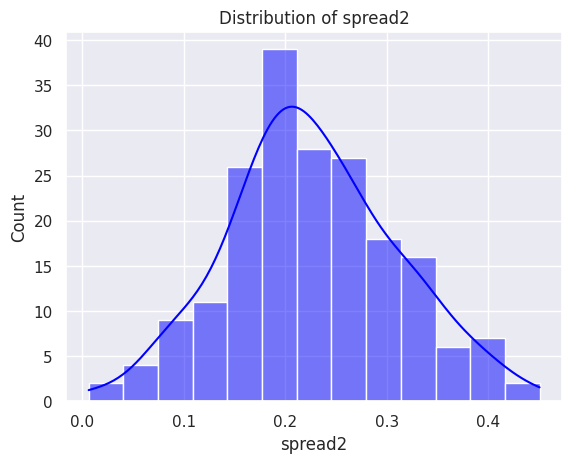

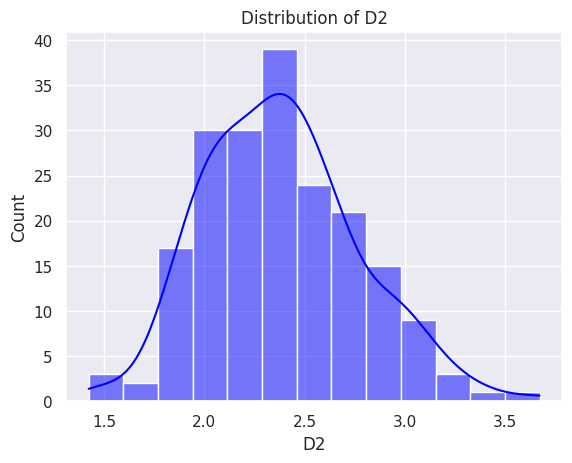

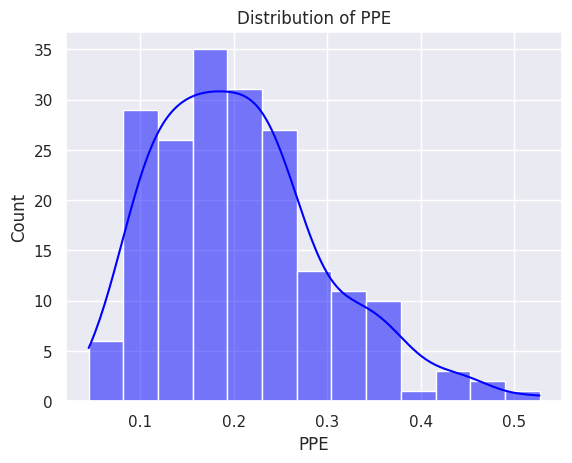

In [ ]:
# Distribution plots for all numeric columns
print("\nDistribution plots for numeric features:")
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

**Checking whether there are any outliers**


Boxplots for numeric features to check for outliers:


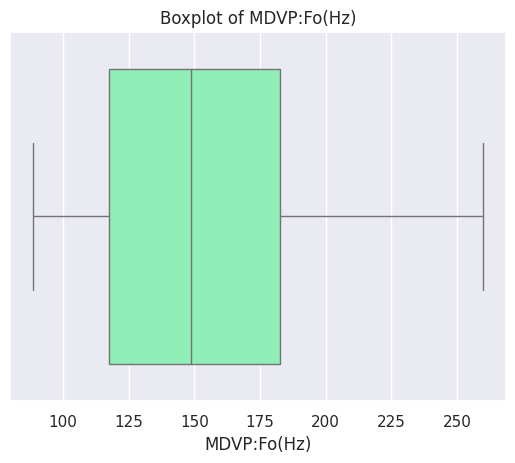

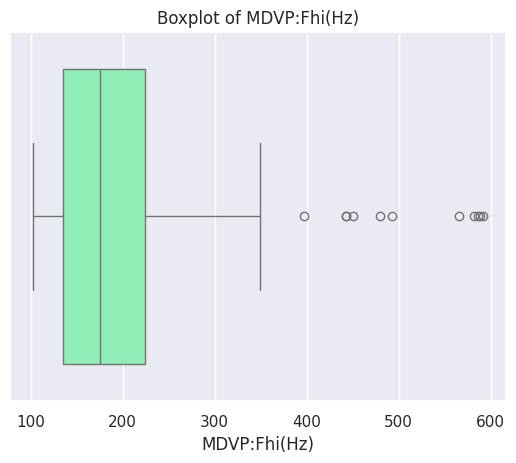

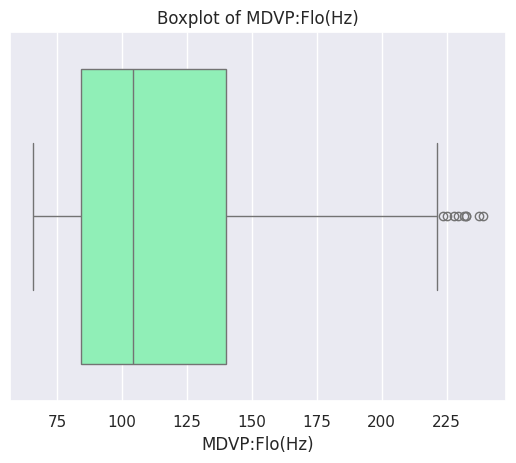

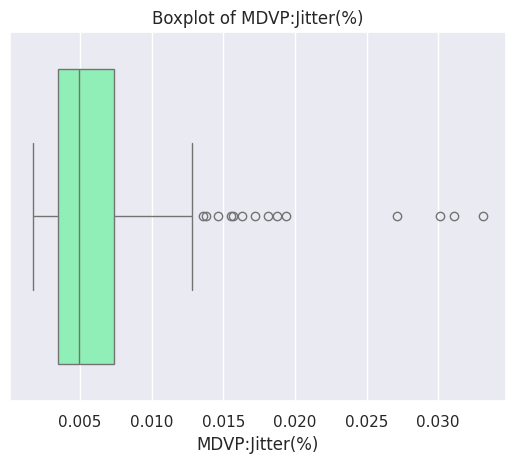

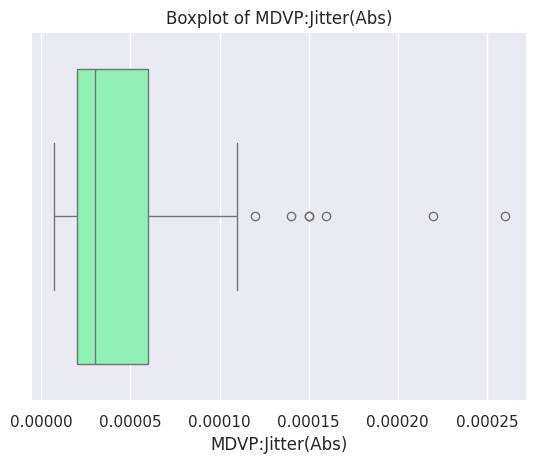

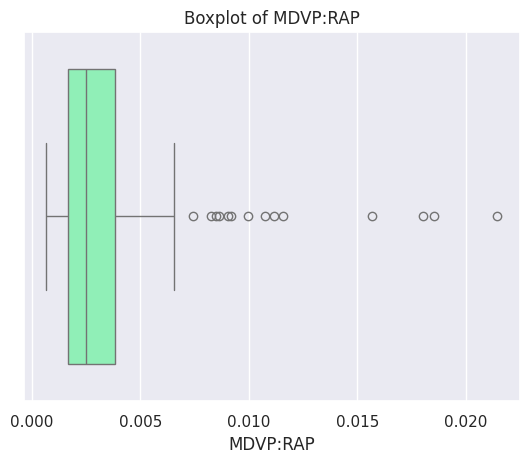

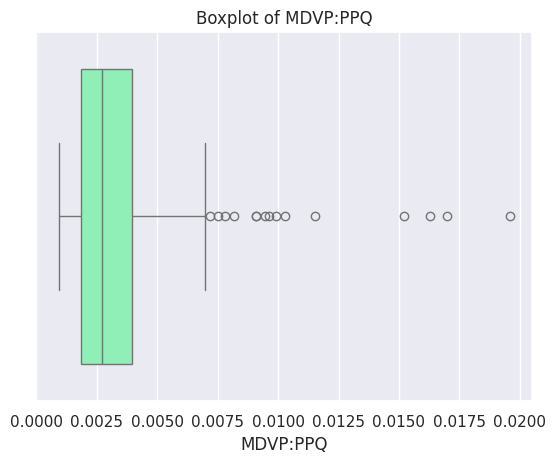

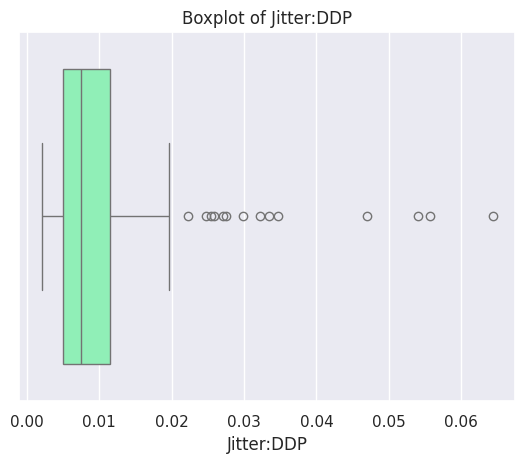

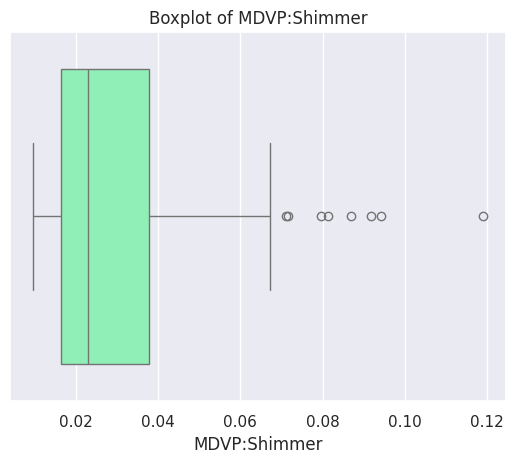

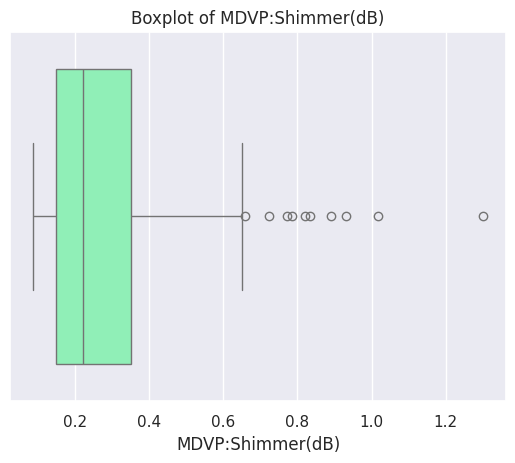

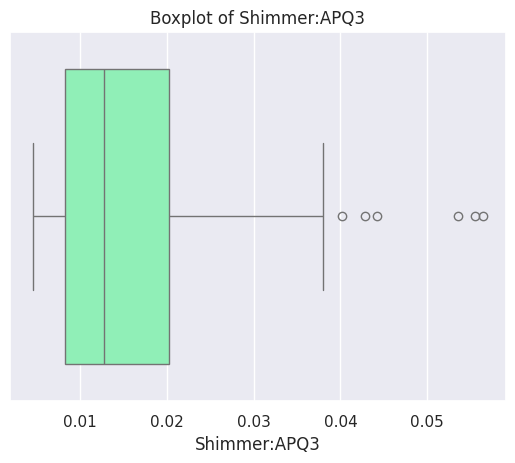

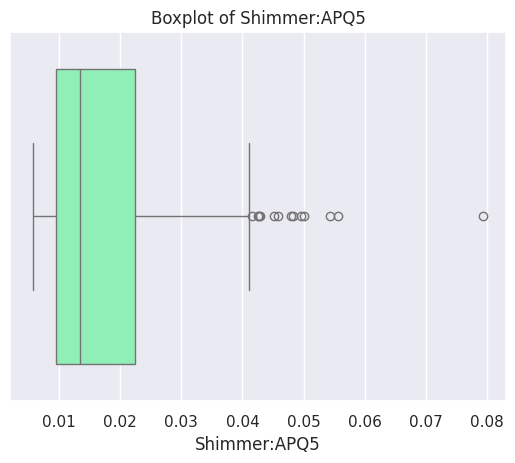

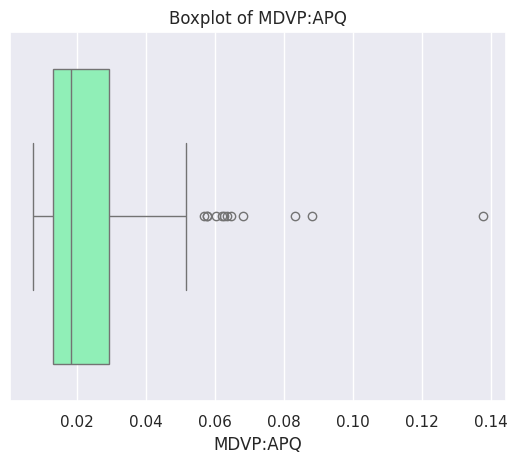

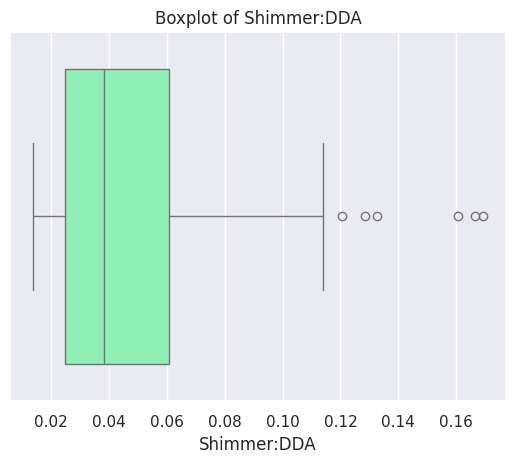

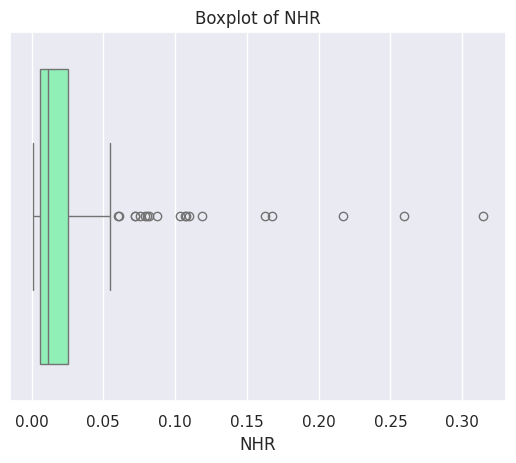

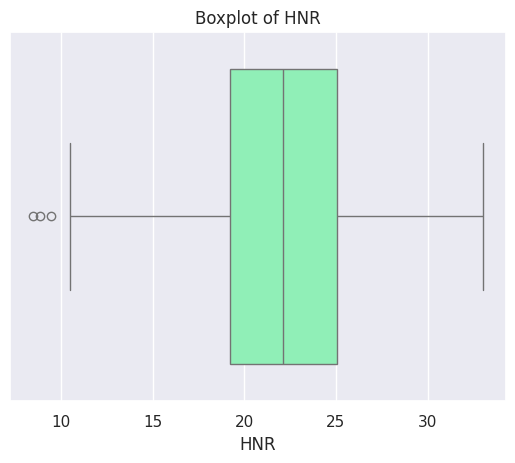

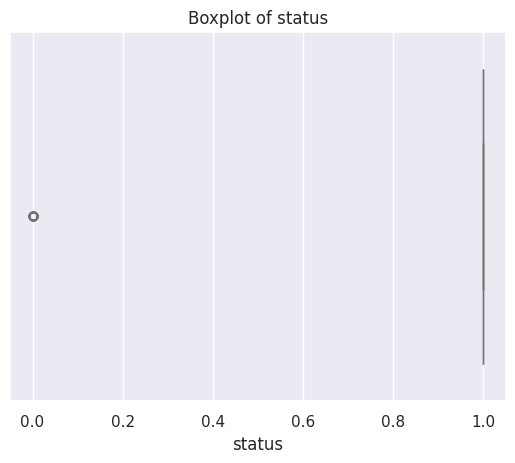

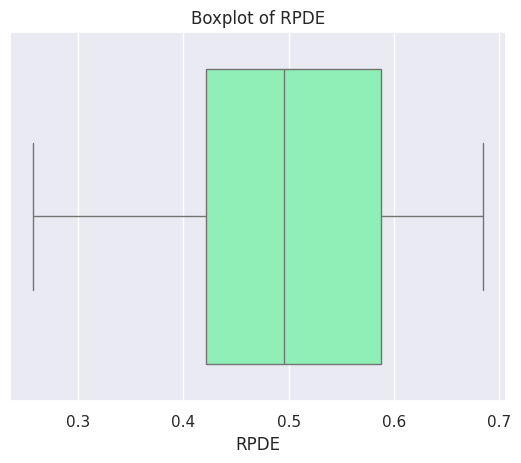

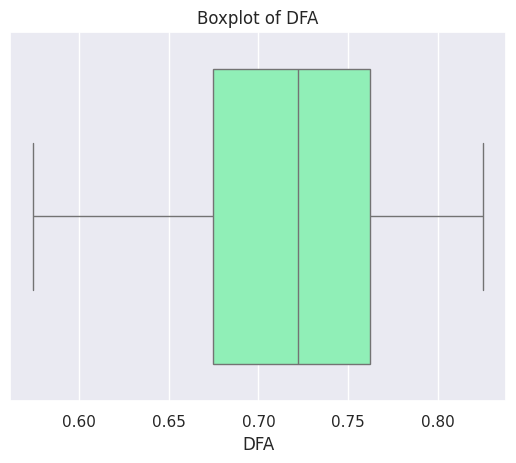

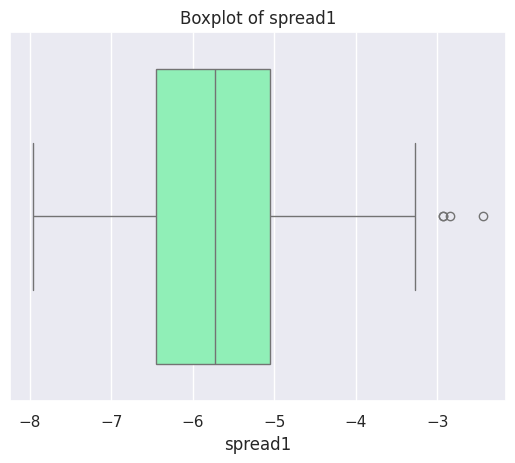

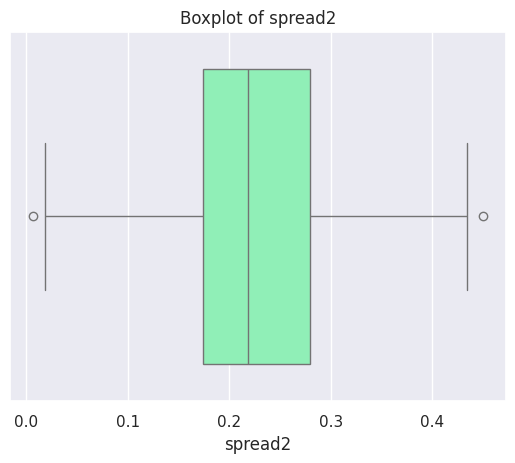

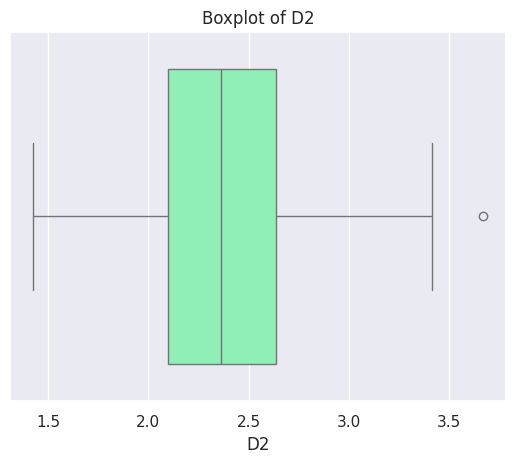

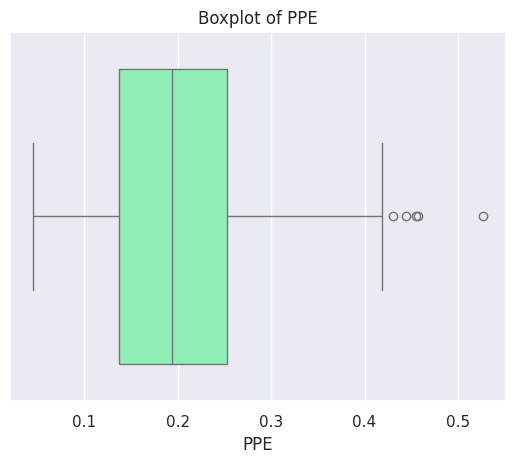

In [ ]:
# Boxplots to check for outliers
print("\nBoxplots for numeric features to check for outliers:")
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col], palette='rainbow')
    plt.title(f"Boxplot of {col}")
    plt.show()

outliers are not treated in this model because,


*   The dataset is related to Parkinson's disease, where certain features (e.g., voice frequency or amplitude) might naturally exhibit significant variability due to the condition's effects.
*  These "outliers" might carry critical information distinguishing patients with Parkinson's from healthy individuals.




**Finding correlation and multicolinearity of features and target variable**


Non-numeric columns: ['name']


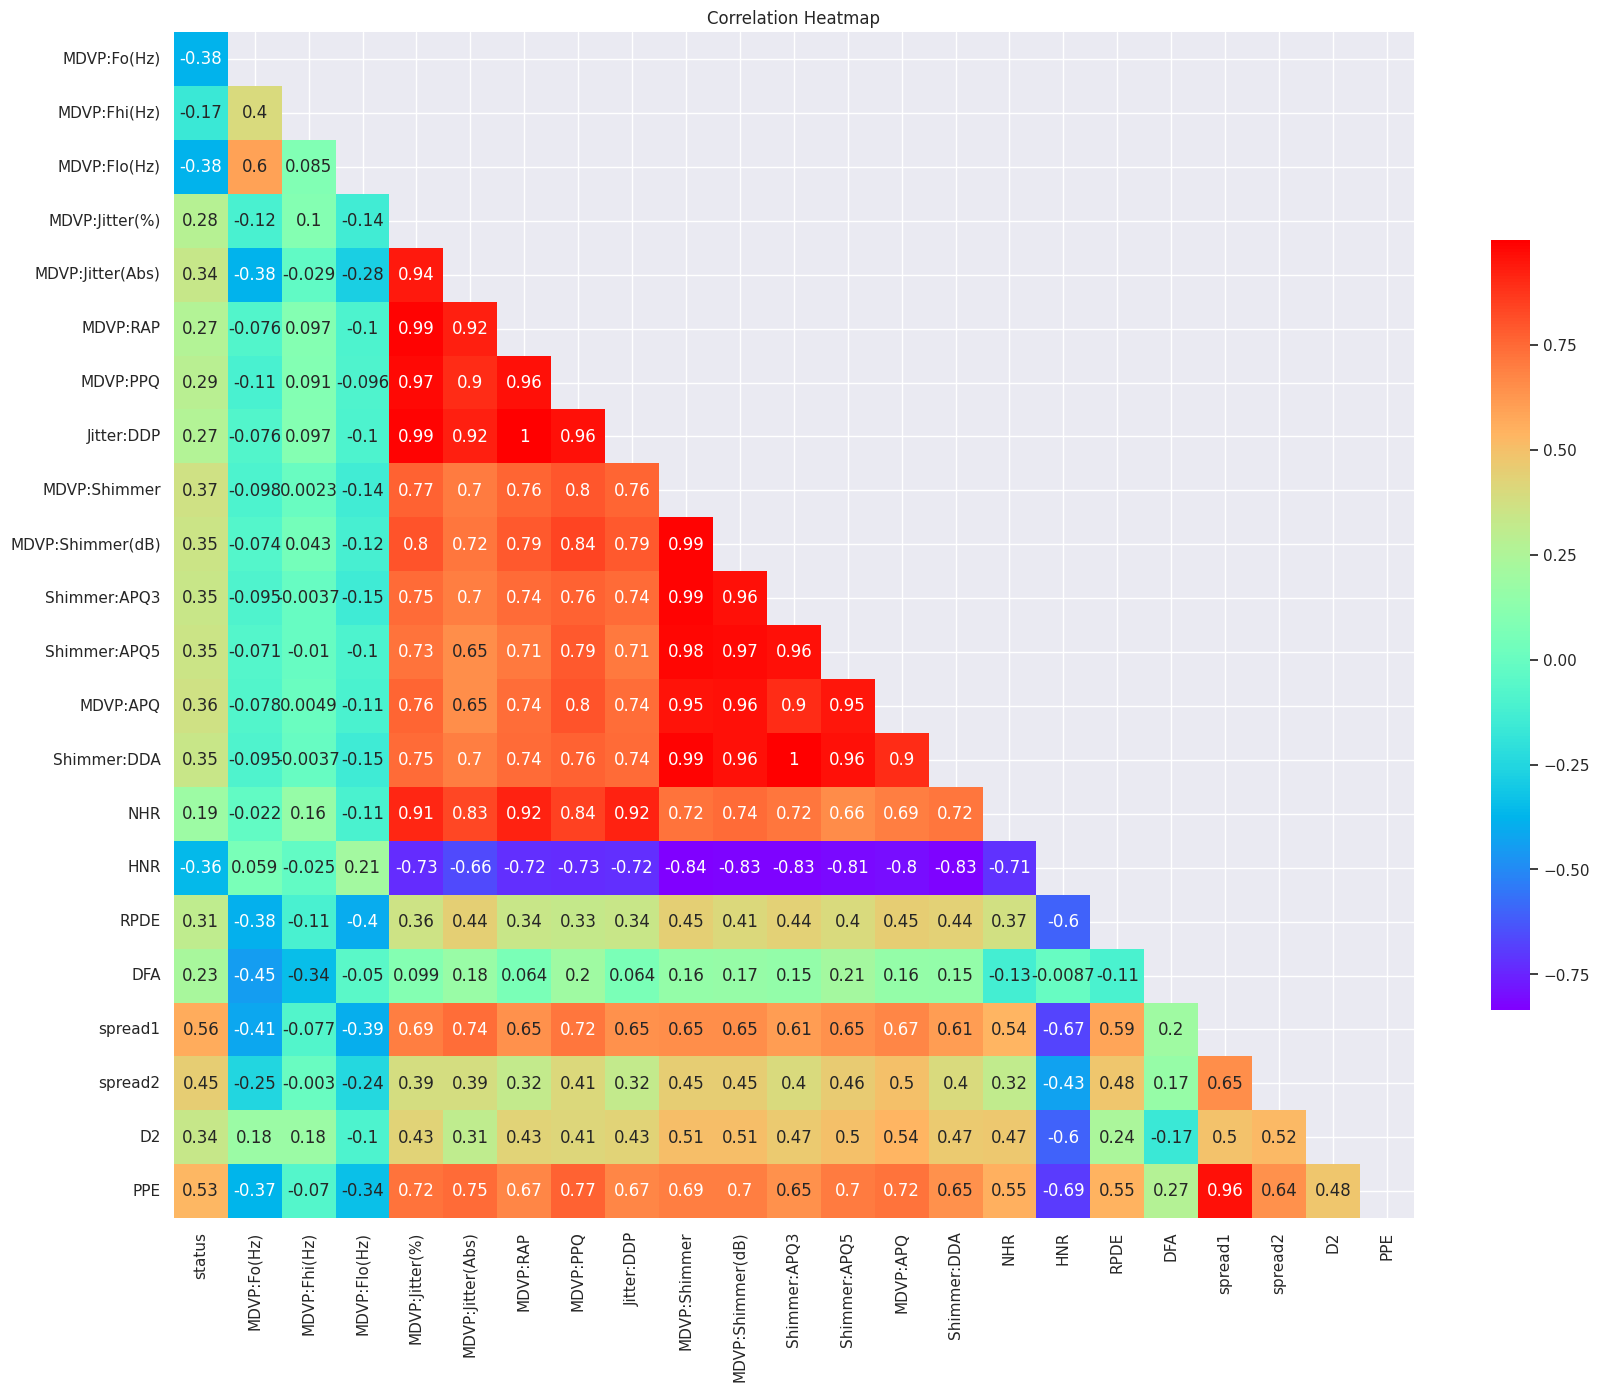

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

if 'status' in corr.columns:
    cols = ['status'] + [col for col in corr.columns if col != 'status']
    corr = corr.loc[cols, cols]

corr = corr.drop(index='status')

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='rainbow',
    square=True,
    linewidths=0,
    cbar_kws={'shrink': 0.5},
    facecolor='white'
)
plt.title("Correlation Heatmap")
plt.show()

According to the above heatmap we have identified there are features that are highly dependent on target variable as well as least depend on the target variable. We also identified some features with multicolinearity.


**Spliting dataset into features and target**

In [ ]:
# Split dataset into features and target
x = df.drop(['status', 'name'], axis=1)
y = df['status']
print(f"Shape of feature matrix: {x.shape}")

Shape of feature matrix: (195, 22)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

In [ ]:
print(x.shape)


(195, 22)


In [ ]:
x.head() #Independent Variable

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
y.head() #Dependent Variable

,status
0,1
1,1
2,1
3,1
4,1


**Train Test Split**

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {x_train.shape}, Test set size: {x_test.shape}")

Training set size: (156, 22), Test set size: (39, 22)


**Using SMOTE to balance the dataset**

After Oversampling - Training set size: (236, 22), Class distribution: status
0    118
1    118
Name: count, dtype: int64


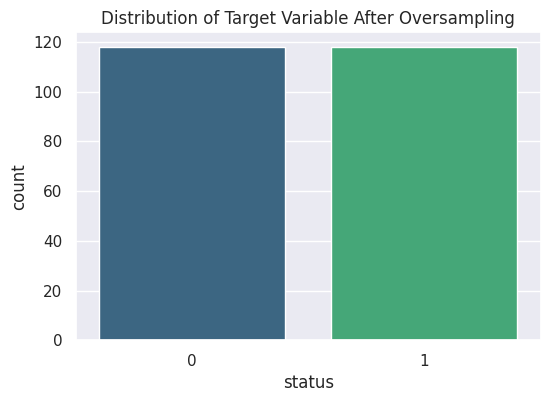

In [ ]:
# Balancing Data Using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(f"After Oversampling - Training set size: {x_train_smote.shape}, Class distribution: {y_train_smote.value_counts()}")
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='viridis')
plt.title("Distribution of Target Variable After Oversampling")
plt.show()


**Scaling train and test set seperately using s]Standard Scalar**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)


we fit and transform only the training data (and not the test data) to prevent data leakage and ensure fair evaluation of the model's performance.By fitting only the training data, we ensure the model has no prior knowledge of the test set.

**Applying SelectKBest to find most important features for the model**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Selecting top 8 features
selector = SelectKBest(mutual_info_classif, k=8)
x_train_kbest = selector.fit_transform(x_train_scaled, y_train_smote)
x_test_kbest = selector.transform(x_test_scaled)
x_train_selected = x_train_kbest
x_test_selected = x_test_kbest
print(f"Number of features selected: {x_train_selected.shape[1]}")

Number of features selected: 8


The reason to use SelectKBest,

*  Selects features with the strongest statistical correlation to the target variable, SelectKBest ensures that only the most important predictors are included, which can improve model performance.
*   SelectKBest is easy to implement and interpret
*  simplicity, speed, and ability to identify significant features without altering their interpretability








# Model Implementation

**SVM - SUpport Vector Machine**


Hyperprameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV


In [ ]:
# SVM with Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=StratifiedKFold(n_splits=5))
grid_svm.fit(x_train_selected, y_train_smote)
best_svm = grid_svm.best_estimator_
print(f"Best Parameters for SVM: {grid_svm.best_params_}")


Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


Support Vector Machine (SVM) is a supervised learning algorithm widely used for classification problems. It is particularly effective in scenarios where the data is not linearly separable.
Reason to select SVM are,


*   SVM works well in high-dimensional spaces, making it ideal for datasets with numerous features.
*   SVM performs efficiently with limited data points, which is beneficial when data availability is constrained


*   SVM was chosen because it can effectively classify the Parkinson's disease dataset, where features may exhibit non-linear relationships.




**KNN- K nearest Neighbors Classification**

Hyperparameter Tuning


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN with Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=StratifiedKFold(n_splits=5))
grid_knn.fit(x_train_selected, y_train_smote)
best_knn = grid_knn.best_estimator_

print(f"Best Parameters for KNN: {grid_knn.best_params_}")

Best Parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm that classifies data points based on the majority class of their nearest neighbors in feature space.Reason to select KNN,


*   KNN is easy to implement and understand, making it an excellent baseline classifier for comparison.



*   KNN is computationally efficient for smaller datasets like ours and can provide reliable predictions.



*  KNN was used to evaluate its performance as a straightforward and interpretable alternative to more complex classifiers like SVM






**Reason to select GridSearchCV,**

---


GridSearch is an approach to hyperparameter optimization, where all possible combinations of a specified parameter grid are evaluated to find the best-performing parameter set.


*    GridSearch ensures that all combinations of hyperparameters are evaluated, providing the best configuration for model performance.
*    By optimizing parameters like C, kernel, and gamma (for SVM) or k, weights, and distance metric (for KNN), GridSearch helps achieve the highest possible accuracy for the given dataset.


*  By tuning parameters for both models, GridSearch ensures a fair and unbiased comparison between SVM and KNN.




# Model Evaluation and Discussion

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


**SVM evaluation**


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



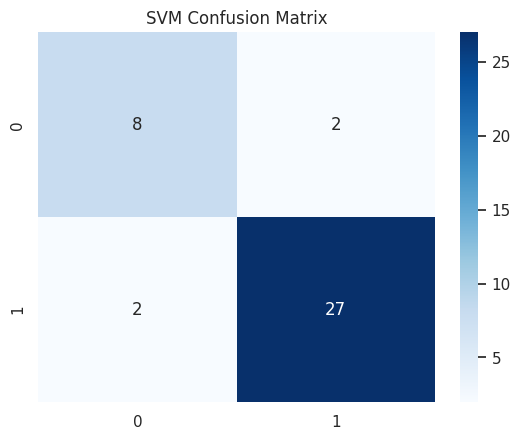

In [ ]:
# SVM Evaluation
y_pred_svm = best_svm.predict(x_test_selected)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()

**KNN Evaluation**


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.90      0.95        29

    accuracy                           0.92        39
   macro avg       0.88      0.95      0.91        39
weighted avg       0.94      0.92      0.93        39



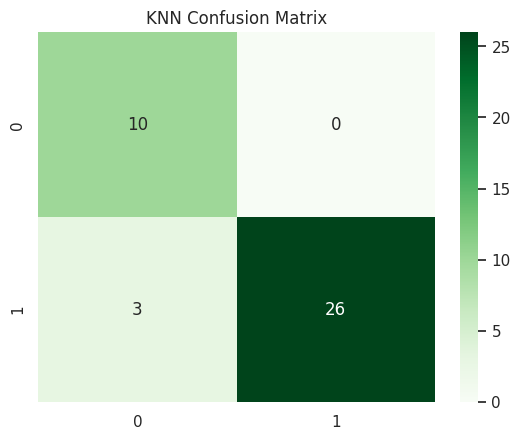

In [ ]:
# KNN Evaluation
y_pred_knn = best_knn.predict(x_test_selected)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Greens', fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()

**Model Evaluation and finding best model**

In [ ]:
# Compare Models
train_accuracy_svm = grid_svm.best_score_
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

train_accuracy_knn = grid_knn.best_score_
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nModel Comparison:")
print(f"SVM: Training Accuracy: {train_accuracy_svm:.2f}, Testing Accuracy: {test_accuracy_svm:.2f}")
print(f"KNN: Training Accuracy: {train_accuracy_knn:.2f}, Testing Accuracy: {test_accuracy_knn:.2f}")


Model Comparison:
SVM: Training Accuracy: 0.94, Testing Accuracy: 0.90
KNN: Training Accuracy: 0.95, Testing Accuracy: 0.92


We have used multiple evaluation metrics to analyze and compare the performance of the SVM and KNN classifiers.Evaluation Metrics Used are,


**1.   Accuracy**
---
*   Accuracy measures the proportion of correctly predicted instances out of the total instances.
*   For SVM, the training accuracy was 0.94, while the testing accuracy was 0.90. For KNN, the training accuracy was 0.95, and the testing accuracy was 0.92.

**2.   Classification Report**
---
*   A detailed classification report was generated for both models, including precision, recall, and F1-score.This provided insights into how well the models handled each class.


 **3.  Confusion Matrix**
---


*   The confusion matrix was visualized to evaluate the models' performance in distinguishing between the two classes.
*   It helped identify whether the models had a bias toward any specific class and highlighted any misclassifications.








**Comparing Models**



*   The SVM model achieved a high training accuracy of 0.94 but slightly lower testing accuracy of 0.90. This indicates that the model performed well but might slightly overfit the training data.
*   The KNN model had a training accuracy of 0.95 and a higher testing accuracy than SVM of 0.92. This demonstrates that KNN was better at generalizing to the unseen testing data, likely due to its non-parametric nature and simplicity.



# **Discussion**

The performance metrics indicate that both SVM and KNN are highly effective for the given dataset. However, there are some important observations

---


*   The SVM model achieved slightly better training accuracy, showing its ability to capture complex patterns in the data.
*  However, the lower testing accuracy suggests mild overfitting, likely due to the optimization of hyperparameters like C and gamma.



*   KNN had a slightly higher training accuracy and outperformed SVM on the testing set with an accuracy of 0.92.Its simplicity and non-parametric nature made it less prone to overfitting.
*   SVM's ability to capture complex relationships is advantageous, but its sensitivity to hyperparameters requires careful tuning.


*   KNN provided a more generalizable solution with a simpler implementation, making it an excellent choice for this dataset.





# Conclusion

In [ ]:
from sklearn.model_selection import cross_val_score

scores_svm = cross_val_score(best_svm, x_train_kbest, y_train_smote, cv=5, scoring='accuracy')
scores_knn = cross_val_score(best_knn, x_train_kbest, y_train_smote, cv=5, scoring='accuracy')

print("SVM Cross-Validation Accuracy:", scores_svm.mean())
print("KNN Cross-Validation Accuracy:", scores_knn.mean())


SVM Cross-Validation Accuracy: 0.9407801418439716
KNN Cross-Validation Accuracy: 0.9450354609929077




*   Cross-validation was conducted to evaluate the consistency of model performance across different data splits. Both SVM and KNN achieved high cross-validation accuracies of 94.08% and 94.50%, respectively, indicating strong generalization capabilities.
*   While both models showed comparable performance, KNN demonstrated a marginally higher cross-validation accuracy, suggesting slightly better generalization to unseen data. However, the difference is negligible, and both models are well-suited.





In [ ]:
# Conclution
if test_accuracy_svm > test_accuracy_knn:
    print("SVM is the better model.")
else:
    print("KNN is the better model.")

KNN is the better model.


Based on the results,

*   KNN is the better-performing model in this scenario, as it achieved higher testing accuracy, indicating better generalization to unseen data.
*  SVM remains a strong candidate for datasets with more complex relationships or in situations where interpretability of decision boundaries is critical.



# References





1.   Marton H. (2019). You Could Have Parkinson's Disease Symptoms in Your 30s or 40s and not Know It. Available online at: https://www.healthdirect.gov.au/blog/parkinsons-disease-symptoms-in-your-30s-40s

2.   S. Galli, "Train In Data," Imbalanced Data, Machine Learning, 20 March 2023. [Online]. Available: https://www.blog.trainindata.com/oversampling-techniques-for-imbalanced-data/.

3.   C. G. Goetz, "Cold Spring Harb Perspect Med," The History of Parkinson's Disease: Early Clinical Descriptions and Neurological Therapies, 1 sep 2011. [Online]. Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC3234454/#:~:text=Parkinson's%20disease%20was%20first%20medically,earlier%20descriptions%20(Parkinson%201817)..

4.   J. B. J. S.-l. S. J. P. R Lafuente, "Clinical Biomechanics," Design and test of neural networks and statistical classifiers in computer-aided movement analysis: a case study on gait analysis, 25 August 1998. [Online]. Available: https://www.sciencedirect.com/science/article/abs/pii/S026800339700082X.

5.   C. D. ,. J. F. Jie Mei, Machine Learning for the Diagnosis of Parkinson's Disease: A Review of Literature, 6 May 2021. [Online]. Available: https://pmc.ncbi.nlm.nih.gov/articles/PMC8134676/.

6.   S. M. R. S. h. S. Radha N, Parkinson’s Disease Detection using Machine Learning Techniques, 2021. [Online]. Available: https://www.revistaclinicapsicologica.com/archivesarticle.php?id=494.

7.   Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)














In [ ]:
!jupyter nbconvert --to html GP_13.ipynb

[NbConvertApp] Converting notebook GP_13.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 51 image(s).
[NbConvertApp] Writing 1998674 bytes to GP_13.html
